In [1]:
__version__ = '0.3'

import numpy as np
import matplotlib.pyplot as plt
#
#def idns(signal, nsec, sampling_freq, overlap, confidence, plot_res):
#
  #  """
  #  Function to determine the index of non-stationarity of a time series:
  #      
  #  Arguments:
  #      signal {numpy array} --  Numpy array of the time series
  #      nsec {float} -- Time lenght of moving window (minimum value = 2/sampling_freq)
  #      sampling_freq {int} -- Sampling frequency of the time series
  #      overlap {float} -- Overlap between windows [0 - 1]
  #      confidence {int} -- Confidence: 90% - 95% - 98% - 99% 
  #      plot_res {boolean} -- True for plot results, False for no plot
  #  
  #  Returns:
  #      Dictionary: 
  #          index {float} -- Index of non-stationarity
  #                           0 [%] --> Non-stationary
  #                           100 [%] --> Stationary
  #          bns {string} -- Stationary or non-stationary
  #          ind_dw {float} -- Lower limit of stationary [%]
  #          ind_up {float} -- Upper limit of stationary [%]
  #  """
  #          
  #  ## Confidence interval
  #  coeff = [1.645, 1.96, 2.326, 2.576]
  #  conf = [90, 95, 98, 99]
  #  alpha = coeff[conf.index(confidence)]
#
  #  ## Windowing
  #  T = len(signal) / sampling_freq - 1 / sampling_freq
  #  time = np.linspace(0, T, len(signal))
  #  ent_stdv = np.std(signal, ddof = 0) # Standard deviation of entire signal
  #  w_point = int(sampling_freq * nsec) # Number of point for each window
  #  lap = int(w_point * overlap)        # Number of point overlapped
  #  L = len(signal)                     # length of the signal
  #  dist = w_point - lap                # Number of point for each compartment
  #  cmp = int(np.floor(L / dist))       # Number of compartment
#
  #  ## Boundaries
  #  stdv = np.empty(cmp)
  #  cls = np.empty((cmp, dist))
#
  #  for i in range(0,cmp):
  #      cls[i] = signal[i*dist:i*dist+dist]
  #      stdv[i] = np.std(cls[i], ddof = 1)
  #      
  #  if L % dist != 0:
  #      res_cmp = signal[cmp*dist+1:]
  #      stdv = np.append(stdv, np.std(res_cmp, ddof = 1))
  #  
  #  cls_std = np.std(stdv, ddof = 0)
#
  #  boundUP = ent_stdv + cls_std
  #  boundDW = ent_stdv - cls_std
#
#
  #  ## Run computation
  #  run = np.empty(0)
  #  N1 = 0
  #  N0 = 0
#
  #  for i in range(0, stdv.shape[0]):
  #      if stdv[i] > boundUP or stdv[i] < boundDW:
  #          run = np.append(run, 1)
  #      else:
  #          run = np.append(run, 0)
#
  #  for i in range(0, len(run)):
  #      if run[i] == 1.:
  #          N1 += 1
  #      else:
  #          N0 += 1
  #      
  #  N = N1 + N0
  #  Nr = 0
#
  #  for i in range(1, len(run)):
  #      if run[i] != run[i-1]:
  #          Nr += 1
#
  #  ## Stationary limits 
  #  mean_val = (2 * N1 * N0) / N + 1
  #  var = (2 * N1 * N0 * (2 * N1 * N0 - N)) / (N**2 * (N - 1))
#
  #  lim_up = mean_val + alpha * np.sqrt(var)
  #  index_up = np.round(100 * lim_up / mean_val, 3)
  #  lim_dw = mean_val - alpha * np.sqrt(var)
  #  index_dw = np.round(100 * lim_dw / mean_val, 3)
#
  #  if Nr >= lim_dw and Nr <= lim_up:   
  #      bns = 'Stationary'
  #  else:
  #      bns = 'Non-stationary' 
  #  
  #  ## Index of non-stationary
  #  index = 100 * Nr / mean_val  
  #  if index > 100:
  #      index = 100
  #  else:
  #      index = np.round(index,2)
  #  
  #  nnst = {'index': index, 'bns':bns, 'ind_dw':index_dw, 'ind_up':index_up}
#
  #  if plot_res == True:
  #      plt.figure()
  #      plt.plot(time,signal, color = 'darkgray', zorder = 2, label = 'Signal')
  #      plt.hlines(np.mean(signal)+ent_stdv, 0, T, colors='C1', linestyles='solid', zorder = 4, label = 'Standard deviation')
  #      plt.plot(np.linspace(0,T,len(stdv)),np.mean(signal)+stdv, color = 'C0', zorder = 3, label = 'Standard deviation windows')
  #      plt.hlines(np.mean(signal) + boundUP, 0, T, colors='C3', linestyles='dashed', zorder = 5, label = 'Boundaries')
  #      plt.hlines(np.mean(signal) + boundDW, 0, T, colors='C3', linestyles='dashed', zorder = 6)
  #      plt.legend(loc=4)
  #      plt.grid(zorder = 1)
  #      plt.xlim([0,T])
  #      plt.xlabel('Time [s]')
  #      plt.ylabel('Amplitude [\]')
  #      plt.show()
  #      
  #  return nnst

In [2]:
data = np.load('C:/Users/Lorenzo/Documents/Lubiana/Nnst/Data/camera11.npy')
signal = data[:,30,35]
nsec = 0.75
sampling_freq = 400
overlap = 0 
confidence = 95
plot_res = True

In [3]:
          
## Confidence interval
coeff = [1.645, 1.96, 2.326, 2.576]
conf = [90, 95, 98, 99]
alpha = coeff[conf.index(confidence)]

## Windowing
L = len(signal) # length of the signal
T = L / sampling_freq - 1 / sampling_freq
time = np.linspace(0, T , len(signal))
ent_stdv = np.std(signal, ddof = 1) # Standard deviation of entire signal

In [6]:
T

19.9975

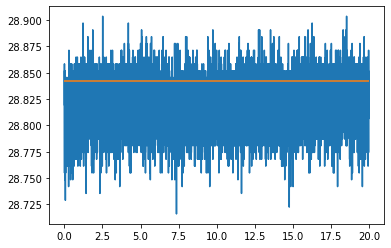

In [4]:
plt.hlines(np.mean(signal)+ent_stdv, 0, T,color='C1', zorder = 1)
plt.plot(time,signal, zorder = 0)

In [8]:
w_point = int(np.ceil(sampling_freq * nsec)) # Number of point for each window
lap = int(w_point * overlap)        # Number of point overlapped
dist = w_point - lap                # Number of point for each compartment
                
cmp = int(np.floor(L / dist))       # Number of compartment

In [11]:
20/26

0.7692307692307693

In [7]:
cls = np.array_split(signal,cmp)
stdv = np.std(cls,axis=1,ddof=1)
cls_stdv = np.std(stdv, ddof = 1)

boundUP = ent_stdv + cls_stdv
boundDW = ent_stdv - cls_stdv

IndexError: tuple index out of range

In [ ]:
8000/0.75

In [ ]:
## Run computation
run = np.empty(0)
N1 = 0
N0 = 0

for i in range(0, stdv.shape[0]):
    if stdv[i] > boundUP or stdv[i] < boundDW:
        run = np.append(run, 1)
    else:
        run = np.append(run, 0)

for i in range(0, len(run)):
    if run[i] == 1.:
        N1 += 1
    else:
        N0 += 1
        
N = N1 + N0
Nr = 0

for i in range(1, len(run)):
    if run[i] != run[i-1]:
        Nr += 1

In [ ]:
## Stationary limits 
mean_val = (2 * N1 * N0) / N + 1
var = (2 * N1 * N0 * (2 * N1 * N0 - N)) / (N**2 * (N - 1))

lim_up = mean_val + alpha * np.sqrt(var)
index_up = np.round(100 * lim_up / mean_val, 3)
lim_dw = mean_val - alpha * np.sqrt(var)
index_dw = np.round(100 * lim_dw / mean_val, 3)

if Nr >= lim_dw and Nr <= lim_up:   
    bns = 'Stationary'
else:
    bns = 'Non-stationary' 
    
## Index of non-stationary
index = 100 * Nr / mean_val  
if index > 100:
    index = 100
else:
    index = np.round(index,2)
    
nnst = {'index': index, 'bns':bns, 'ind_dw':index_dw, 'ind_up':index_up}

if plot_res == True:
    plt.figure()
    plt.plot(time,signal, color = 'darkgray', zorder = 2, label = 'Signal')
    plt.hlines(np.mean(signal)+ent_stdv, 0, T, colors='C1', linestyles='solid', zorder = 4, label = 'Standard deviation')
    plt.plot(np.linspace(0,T,len(stdv)),np.mean(signal)+stdv, color = 'C0', zorder = 3, label = 'Standard deviation windows')
    plt.hlines(np.mean(signal) + boundUP, 0, T, colors='C3', linestyles='dashed', zorder = 5, label = 'Boundaries')
    plt.hlines(np.mean(signal) + boundDW, 0, T, colors='C3', linestyles='dashed', zorder = 6)
    plt.legend(loc=4)
    plt.grid(zorder = 1)
    plt.xlim([0,T])
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude [\]')
    plt.show()